# CNN classifier for the MNIST dataset

### Instructions

In this notebook, you will write code to build, compile and fit a convolutional neural network (CNN) model to the MNIST dataset of images of handwritten digits.

Some code cells are provided you in the notebook. You should avoid editing provided code, and make sure to execute the cells in order to avoid unexpected errors. Some cells begin with the line:

`#### GRADED CELL ####`

Don't move or edit this first line - this is what the automatic grader looks for to recognise graded cells. These cells require you to write your own code to complete them, and are automatically graded when you submit the notebook. Don't edit the function name or signature provided in these cells, otherwise the automatic grader might not function properly. Inside these graded cells, you can use any functions or classes that are imported below, but make sure you don't use any variables that are outside the scope of the function.

### How to submit

Complete all the tasks you are asked for in the worksheet. When you have finished and are happy with your code, press the **Submit Assignment** button at the top of this notebook.

### Let's get started!

We'll start running some imports, and loading the dataset. Do not edit the existing imports in the following cell. If you would like to make further Tensorflow imports, you should add them here.

In [ ]:
#### PACKAGE IMPORTS ####

# Run this cell first to import all required packages. Do not make any imports elsewhere in the notebook

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# If you would like to make further imports from Tensorflow, add them here
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

# The MNIST dataset

In this assignment, you will use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). It consists of a training set of 60,000 handwritten digits with corresponding labels, and a test set of 10,000 images. The images have been normalised and centred. The dataset is frequently used in machine learning research, and has become a standard benchmark for image classification models.

- Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998.

Your goal is to construct a neural network that classifies images of handwritten digits into one of 10 classes.

# Load and preprocess the data

In [50]:
# Run this cell to load the MNIST data

mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

First, preprocess the data by scaling the training and test images so their values lie in the range from 0 to 1.

In [51]:
#### GRADED CELL ####

# Complete the following function.
# Make sure to not change the function name or arguments.

def scale_mnist_data(train_images, test_images):
    """
    This function takes in the training and test images as loaded in the cell above, and scales them
    so that they have minimum and maximum values equal to 0 and 1 respectively.
    Your function should return a tuple (train_images, test_images) of scaled training and test images.
    """
    
    train_images = train_images.astype('float32') / 255.0
    test_images = test_images.astype('float32') / 255.0
    
    return (train_images, test_images)

In [52]:
# Run your function on the input data

scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

In [53]:
# Add a dummy channel dimension

scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

# Build the convolutional neural network model

We are now ready to construct a model to fit to the data. Using the Sequential API, build your CNN model according to the following spec:

* The model should use the `input_shape` in the function argument to set the input size in the first layer.
* A 2D convolutional layer with a 3x3 kernel and 8 filters. Use 'SAME' zero padding and ReLU activation functions. Make sure to provide the `input_shape` keyword argument in this first layer.
* A max pooling layer, with a 2x2 window, and default strides.
* A flatten layer, which unrolls the input into a one-dimensional tensor.
* Two dense hidden layers, each with 64 units and ReLU activation functions.
* A dense output layer with 10 units and the softmax activation function.

In particular, your neural network should have six layers.

In [ ]:
#### GRADED CELL ####

# Complete the following function.
# Make sure to not change the function name or arguments.

def get_model(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(8, (3, 3), padding='same', activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    return model


In [55]:
# Run your function to get the model

model = get_model(scaled_train_images[0].shape)

/home/nvidia/miniforge3/envs/rapids-25.10-cuda12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the model

You should now compile the model using the `compile` method. To do so, you need to specify an optimizer, a loss function and a metric to judge the performance of your model.

In [56]:
#### GRADED CELL ####

# Complete the following function.
# Make sure to not change the function name or arguments.

def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with default settings), the cross-entropy loss function and
    accuracy as the only metric.
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [57]:
# Run your function to compile the model

compile_model(model)

# Fit the model to the training data

Now you should train the model on the MNIST dataset, using the model's `fit` method. Set the training to run for 5 epochs, and return the training history to be used for plotting the learning curves.

In [58]:
#### GRADED CELL ####

# Complete the following function.
# Make sure to not change the function name or arguments.

def train_model(model, scaled_train_images, train_labels):
    """
    This function should train the model for 5 epochs on the scaled_train_images and train_labels.
    Your function should return the training history, as returned by model.fit.
    """
    history = model.fit(scaled_train_images, train_labels, epochs=5)
    return history



In [59]:
# Run your function to train the model

history = train_model(model, scaled_train_images, train_labels)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9373 - loss: 0.2146
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9769 - loss: 0.0740
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9843 - loss: 0.0516
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9870 - loss: 0.0404
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9902 - loss: 0.0313


## Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss

We will load the model history into a pandas `DataFrame` and use the `plot` method to output the required graphs.

In [60]:
# Run this cell to load the model history into a pandas DataFrame

frame = pd.DataFrame(history.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

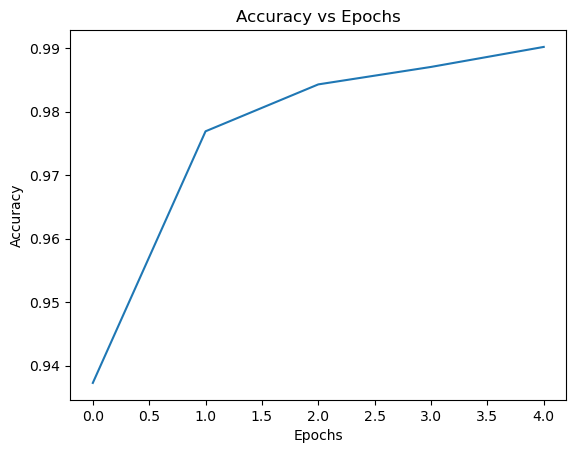

In [61]:
# Run this cell to make the Accuracy vs Epochs plot

acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

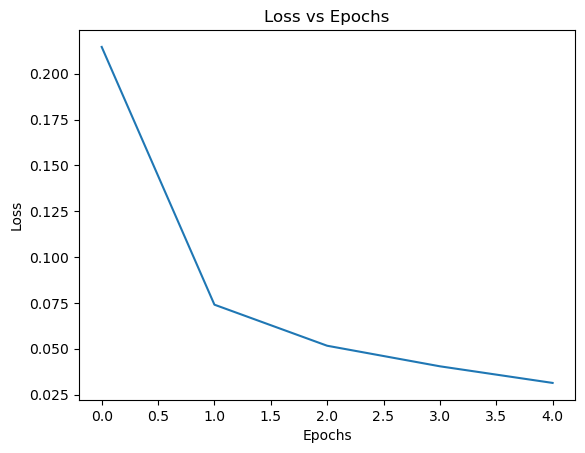

In [62]:
# Run this cell to make the Loss vs Epochs plot

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

## View the Kernels

In [63]:
def plot_kernels(model):
    """
    This function plots the kernels of the first convolutional layer of the model.
    """
    cmap = 'berlin_r'
    norm = plt.Normalize(vmin=-1, vmax=1)
    conv_layer = model.layers[0]              # or model.get_layer(index=0)
    weights, biases = conv_layer.get_weights()

    print("weights.shape:", weights.shape)
    print("biases.shape:", biases.shape)

    kernels = weights  # shape: (3, 3, 1, 16)

    n_filters = kernels.shape[-1]

    # Choose a grid size (e.g., 4x4 for 16 filters)
    n_cols = 3
    n_rows = int(np.ceil(n_filters / n_cols))

    plt.figure(figsize=(8, 8))

    for i in range(n_filters):
        # kernel for filter i, shape: (3, 3, 1)
        k = kernels[:, :, 0, i]   # squeeze channel dimension → (3,3)
        
        ax = plt.subplot(n_rows, n_cols, i + 1)
        ax.imshow(k, interpolation='nearest', cmap=cmap, norm=norm)
        ax.set_title(f"Filter {i}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

    print("Filter 0 weights:\n", kernels[:, :, 0, 0])
    print("\nFilter 1 weights:\n", kernels[:, :, 0, 1])
    print("\nFilter 5 weights:\n", kernels[:, :, 0, 5])

weights.shape: (3, 3, 1, 8)
biases.shape: (8,)


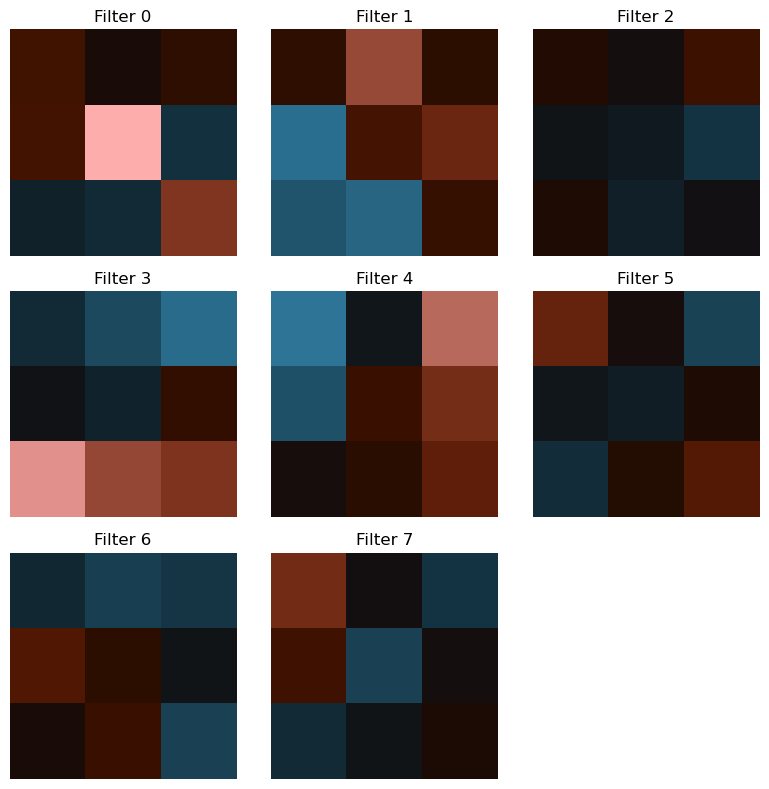

Filter 0 weights:
 [[-0.25230172 -0.00217203 -0.14592636]
 [-0.26864308 -1.1134224   0.24666522]
 [ 0.17072698  0.21190731 -0.50951976]]

Filter 1 weights:
 [[-0.15368646 -0.5951861  -0.13752337]
 [ 0.5241043  -0.28062767 -0.44336066]
 [ 0.406279    0.48614588 -0.19271389]]

Filter 5 weights:
 [[-0.41597378  0.023114    0.33535823]
 [ 0.09815542  0.14101799 -0.03978282]
 [ 0.23063082 -0.08280449 -0.34448975]]


In [64]:
plot_kernels(model)

## Activation Maximization

In [ ]:
def optimize_pattern_for_filter(filter_index, steps=80, step_size=0.5):
    """
    This function optimizes an input image to maximize the activation of a specific filter in the first
    convolutional layer of the model.
    """
    # Start from uniform noise in [-1, 1]
    input_img = tf.Variable(
        tf.random.uniform((1, 28, 28, 1), minval=-1.0, maxval=1.0),
        dtype=tf.float32,
    )

    for step in range(steps):
        with tf.GradientTape() as tape:
            activations = conv_layer(input_img)               # (1, H', W', 16)
            loss = tf.reduce_mean(activations[..., filter_index])

        grads = tape.gradient(loss, input_img)
        grads /= (tf.norm(grads) + 1e-8)                     # normalize
        input_img.assign_add(step_size * grads)

        # Keep the synthetic image in the same range used during training
        input_img.assign(tf.clip_by_value(input_img, -1.0, 1.0))

    # Convert to [0,1] just for display
    pattern = input_img[0, :, :, 0].numpy()
    pattern -= pattern.min()
    pattern /= (pattern.max() - pattern.min() + 1e-8)
    return pattern


def visualize_conv_filters(model):
    """
    This function visualizes the patterns that maximize the activation of each filter in the first convolutional layer.
    """
    conv_layer = model.layers[0]           # first Conv2D layer
    n_filters = conv_layer.filters         # = 16

    steps = 80
    step_size = 0.5

    # Compute patterns for all filters
    patterns = []
    for f in range(n_filters):
        print(f"Optimizing filter {f}")
        patterns.append(optimize_pattern_for_filter(f, steps=steps, step_size=step_size))

    # Plot them in a grid
    n_cols = 3
    n_rows = int(np.ceil(n_filters / n_cols))

    cmap = 'berlin_r'
    norm = plt.Normalize(vmin=-1, vmax=1)
    plt.figure(figsize=(8, 8))
    for i, pattern in enumerate(patterns):
        ax = plt.subplot(n_rows, n_cols, i + 1)
        ax.imshow(pattern, cmap=cmap, norm=norm)
        ax.set_title(f"Filter {i}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

Optimizing filter 0
Optimizing filter 1
Optimizing filter 2
Optimizing filter 3
Optimizing filter 4
Optimizing filter 5
Optimizing filter 6
Optimizing filter 7


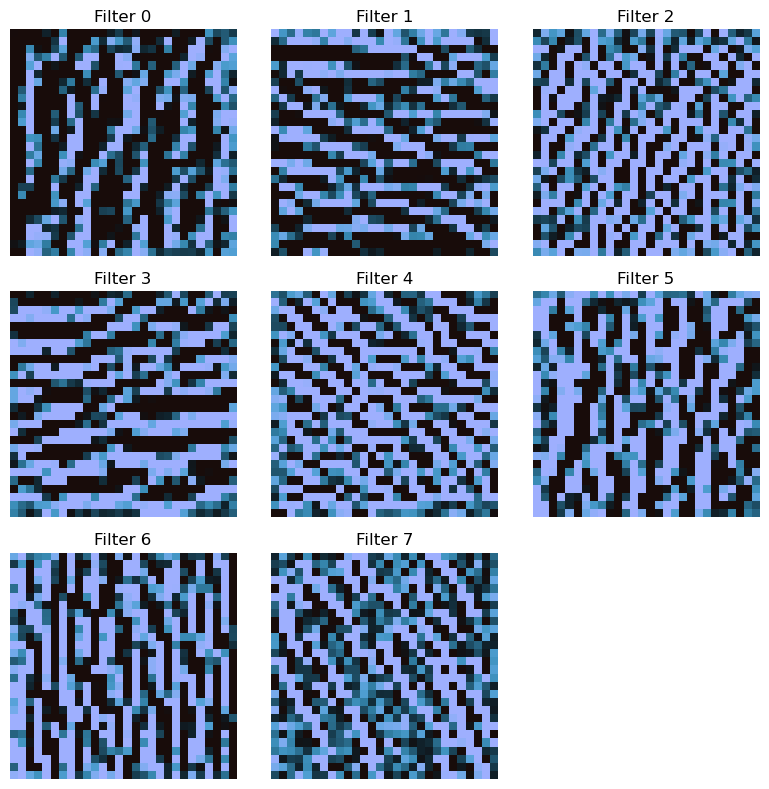

In [67]:
visualize_conv_filters(model)

# Evaluate the model

Finally, you should evaluate the performance of your model on the test set, by calling the model's `evaluate` method.

In [68]:
#### GRADED CELL ####

# Complete the following function.
# Make sure to not change the function name or arguments.

def evaluate_model(model, scaled_test_images, test_labels):
    """
    This function should evaluate the model on the scaled_test_images and test_labels.
    Your function should return a tuple (test_loss, test_accuracy).
    """
    test_loss, test_accuracy = model.evaluate(scaled_test_images, test_labels)
    return (test_loss, test_accuracy)



In [69]:
# Run your function to evaluate the model

test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9875 - loss: 0.0438
Test loss: 0.04377908632159233
Test accuracy: 0.987500011920929


## Confusion Matrix

In [46]:
# plot heatmap of confusion matrix

y_pred = model.predict(test_images[..., np.newaxis])
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


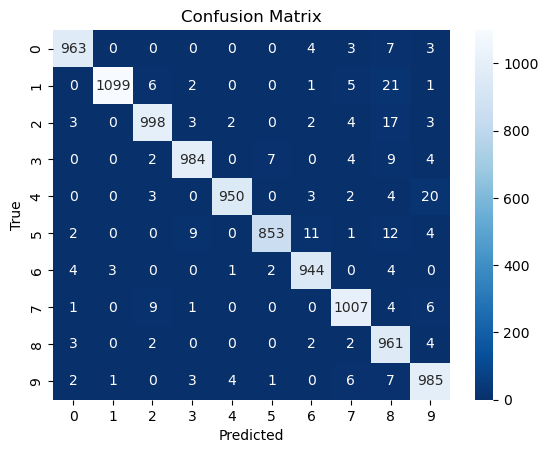

In [29]:
cm = confusion_matrix(test_labels, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues_r')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Classification Report

In [70]:
# get metrics for further analysis

report = classification_report(test_labels, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       1.00      0.90      0.95      1135
           2       0.96      0.95      0.96      1032
           3       0.99      0.84      0.91      1010
           4       0.99      0.95      0.97       982
           5       0.99      0.79      0.88       892
           6       0.96      0.97      0.96       958
           7       0.99      0.93      0.96      1028
           8       0.63      0.99      0.77       974
           9       0.96      0.93      0.94      1009

    accuracy                           0.92     10000
   macro avg       0.94      0.92      0.93     10000
weighted avg       0.94      0.92      0.93     10000



# Model predictions

Let's see some model predictions! We will randomly select four images from the test data, and display the image and label for each.

For each test image, model's prediction (the label with maximum probability) is shown, together with a plot showing the model's categorical distribution.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


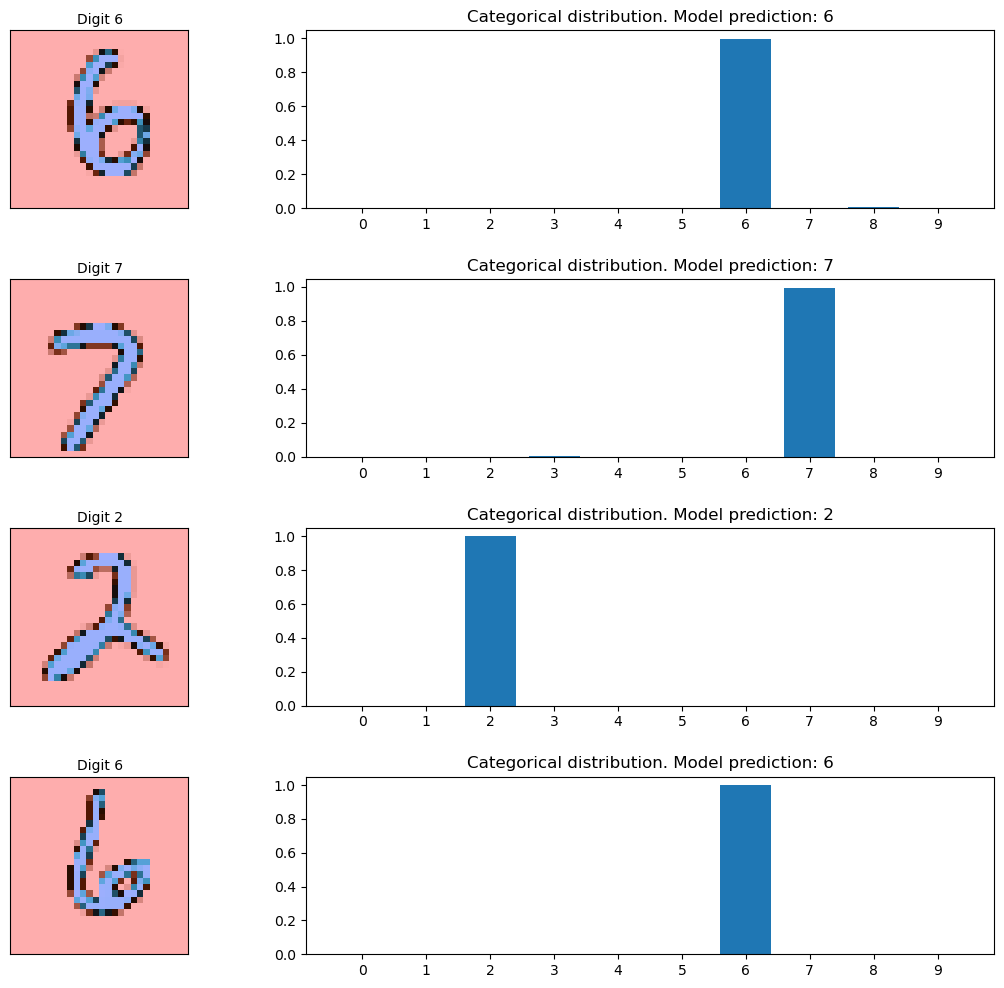

In [71]:
# Run this cell to get model predictions on randomly selected test images

num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image), cmap='berlin_r', norm=plt.Normalize(vmin=0, vmax=1))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")

plt.show()

Congratulations for completing this programming assignment! In the next week of the course we will take a look at including validation and regularisation in our model training, and introduce Keras callbacks.

In [86]:
def make_one_prediction(model, scaled_test_images):
    """
    This function selects a random test image, visualizes it, and gets the model's prediction for it.
    """

    # Visualize it
    random_inx = np.random.choice(scaled_test_images.shape[0])

    image = scaled_test_images[random_inx]

    cmap = 'berlin_r'
    norm = plt.Normalize(vmin=0, vmax=1)
    plt.imshow(image.squeeze(), cmap=cmap, norm=norm)
    plt.colorbar()
    plt.show()

    # Get the model predictions
    random_test_images = scaled_test_images[random_inx, ...]
    sample = random_test_images[np.newaxis, ...]
    predictions = model.predict(sample)
    for i, p in enumerate(predictions[0]):
        print(f"Probability of digit {i}: {p:.16f}")
    print(f"Model prediction: {np.argmax(predictions[0])}")


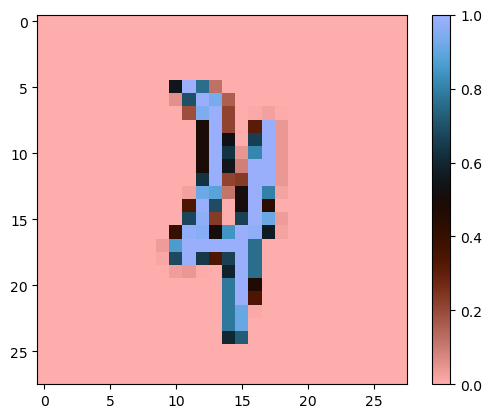

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Probability of digit 0: 0.0000119955411719
Probability of digit 1: 0.0115442592650652
Probability of digit 2: 0.0246137864887714
Probability of digit 3: 0.0340072028338909
Probability of digit 4: 0.7235845327377319
Probability of digit 5: 0.0000031935146581
Probability of digit 6: 0.0000458841641375
Probability of digit 7: 0.1918348819017410
Probability of digit 8: 0.0123516656458378
Probability of digit 9: 0.0020025933627039
Model prediction: 4


In [88]:
make_one_prediction(model, scaled_test_images)

## Visualize feature maps after MaxPooling2D for the same sample

In [80]:
def visualize_feature_maps(model, sample):
    """
    This function visualizes the feature maps produced by the first convolutional layer and the subsequent pooling
    layer for a given input sample.
    """
    cmap = 'berlin_r'
    norm = plt.Normalize(vmin=0, vmax=1)

    # First and second layers: Conv2D and MaxPooling2D
    conv_layer = model.layers[0]
    pool_layer = model.layers[1]

    # Forward pass through Conv and then Pool
    conv_output = conv_layer(sample)      # (1, H1, W1, 16)
    pool_output = pool_layer(conv_output) # (1, H2, W2, 16)

    conv_maps = conv_output[0].numpy()    # (H1, W1, 16)
    pool_maps = pool_output[0].numpy()    # (H2, W2, 16)

    print("Conv feature maps shape:", conv_maps.shape)
    print("Pooled feature maps shape:", pool_maps.shape)

    n_filters = conv_maps.shape[-1]
    n_cols = 4
    n_rows = int(np.ceil(n_filters / n_cols))

    # 1) Conv feature maps
    plt.figure(figsize=(8, 8))
    for i in range(n_filters):
        fmap = conv_maps[:, :, i]
        ax = plt.subplot(n_rows, n_cols, i + 1)
        ax.imshow(fmap, cmap=cmap, norm=norm)
        ax.set_title(f"Conv {i}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

    # 2) Pooled feature maps
    plt.figure(figsize=(8, 8))
    for i in range(n_filters):
        fmap = pool_maps[:, :, i]
        ax = plt.subplot(n_rows, n_cols, i + 1)
        ax.imshow(fmap, cmap=cmap, norm=norm)
        ax.set_title(f"Pooled {i}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Conv feature maps shape: (26, 26, 8)
Pooled feature maps shape: (13, 13, 8)


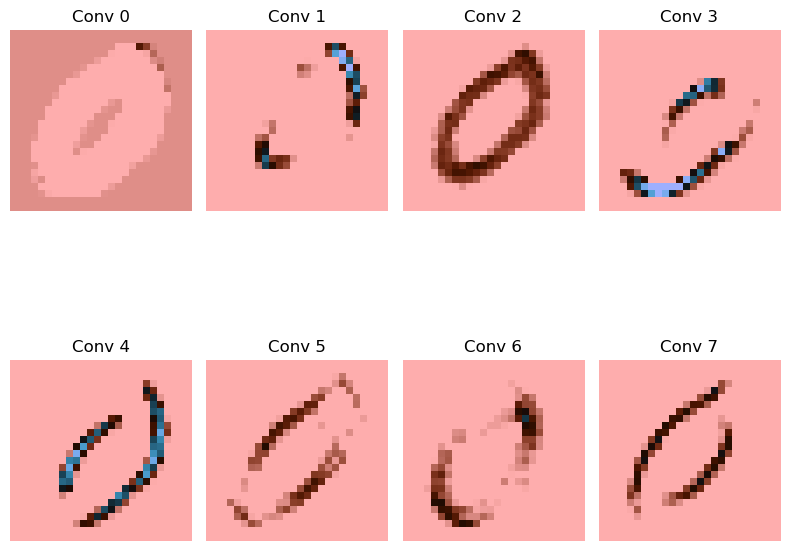

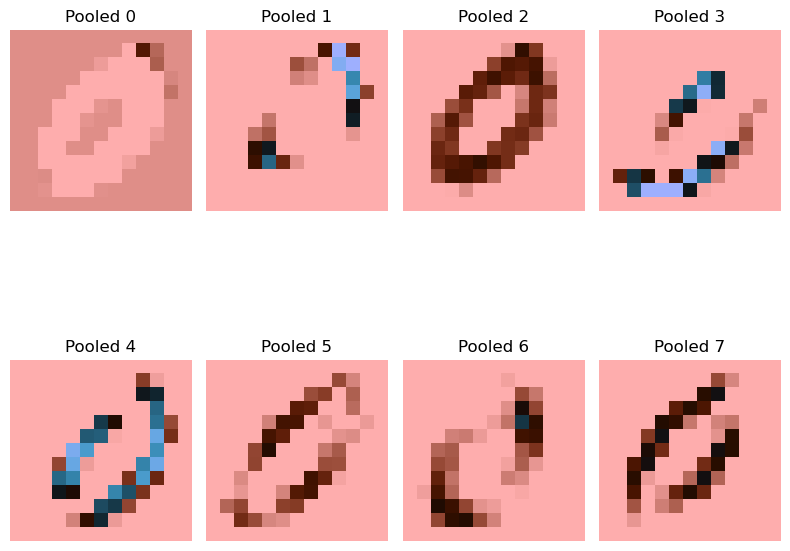

In [81]:
visualize_feature_maps(model, sample)

## Saliency map for the same sample image

In [82]:
def visualize_saliency_map(model, sample):
    """
    This function visualizes the saliency map for a given input sample.
    """
    cmap = 'berlin_r'
    norm = plt.Normalize(vmin=0, vmax=1)

    # Ensure sample is a Tensor with gradient tracking
    x = tf.convert_to_tensor(sample, dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(x)                 # track input
        preds = model(x)              # forward pass
        pred_class = tf.argmax(preds[0])
        loss = preds[:, pred_class]   # score of predicted class

    # Gradient of class score w.r.t. input pixels
    grads = tape.gradient(loss, x)[0]        # (28, 28, 1)

    # Turn into a 2D saliency map
    saliency = tf.abs(grads)
    saliency = tf.reduce_max(saliency, axis=-1).numpy()  # (28, 28)

    # Normalize for visualization
    saliency -= saliency.min()
    saliency /= (saliency.max() + 1e-8)

    plt.figure(figsize=(8, 4))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(sample[0, :, :, 0], cmap=cmap, norm=norm)
    plt.title("Original")
    plt.axis('off')

    # Saliency map
    plt.subplot(1, 2, 2)
    plt.imshow(saliency, cmap='Blues_r')
    plt.colorbar()
    plt.title("Saliency")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

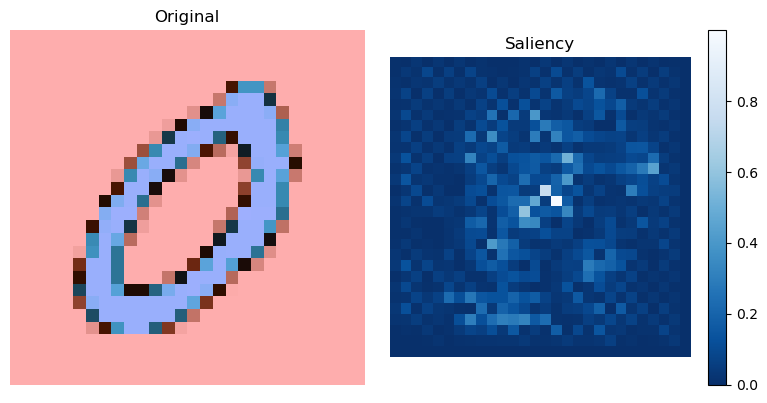

In [83]:
visualize_saliency_map(model, sample)